In [1]:
#Importing librarys

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



In [7]:
# Building the SVM Model

train_df = pd.read_csv("data/processed/train_engineered.csv")
val_df = pd.read_csv("data/processed/validation_engineered.csv")

x_train = train_df.drop("Attrition", axis=1)
y_train = train_df["Attrition"]

x_val = val_df.drop("Attrition", axis=1)
y_val = val_df["Attrition"]

# Initialize the SVM model
# SVM is distance-based model --> scaling is required
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)
svm_model=SVC(kernel='linear', C=1, random_state=42)

# Train the model
svm_model.fit(x_train_scaled, y_train)

# Predictions using SVM
svm_predictions=svm_model.predict(x_val_scaled)

In [8]:
# Evaluate the model performance
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_report = classification_report(y_val, svm_predictions)

print(f"SVM Accuracy: {100*svm_accuracy:.2f}%")
print("SVM Classification Report:\n", svm_report)

SVM Accuracy: 75.00%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      5681
           1       0.74      0.74      0.74      5192

    accuracy                           0.75     10873
   macro avg       0.75      0.75      0.75     10873
weighted avg       0.75      0.75      0.75     10873



In [9]:
print('Comparing Predictions vs Actuall Values: (for the first 10 samples)\n')
print("Predictions:  ", " ".join(map(str, svm_predictions[:10])))
print("Actual Values:", " ".join(map(str, y_val.values[:10])))

Comparing Predictions vs Actuall Values: (for the first 10 samples)

Predictions:   1 0 1 1 1 1 1 0 1 0
Actual Values: 1 0 1 1 0 1 1 0 1 0


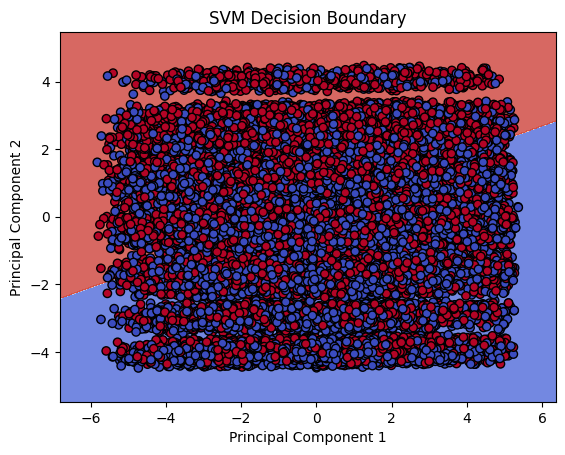

In [10]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)

# Fit the SVM model again on the reduced data
svm_model_pca = SVC(kernel='linear', C=1, random_state=42)
svm_model_pca.fit(x_train_pca, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(x_train_pca, y_train, svm_model_pca)